## Titanic Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
dataset=pd.read_csv('C:/Users/KARTHIK.G/Downloads/titanic_train.csv')
dataset.shape

(891, 12)

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


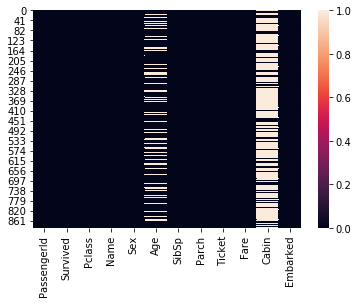

In [5]:
sb.heatmap(dataset.isnull())

In [6]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


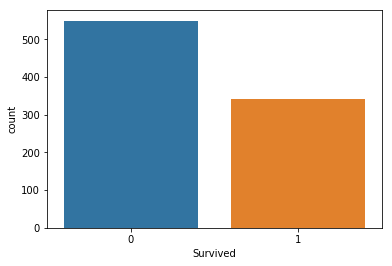

In [7]:
sb.countplot(x='Survived',data=dataset)

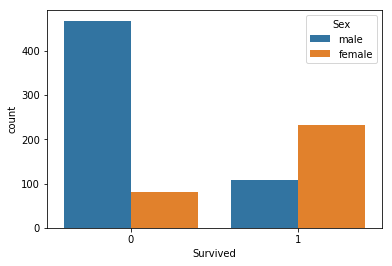

In [8]:
sb.countplot(x='Survived',hue='Sex',data=dataset)

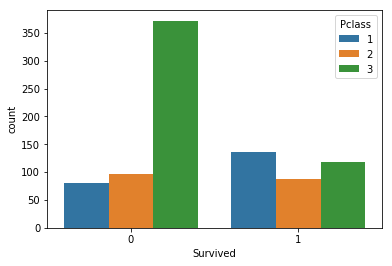

In [9]:
sb.countplot(x='Survived',hue='Pclass',data=dataset)

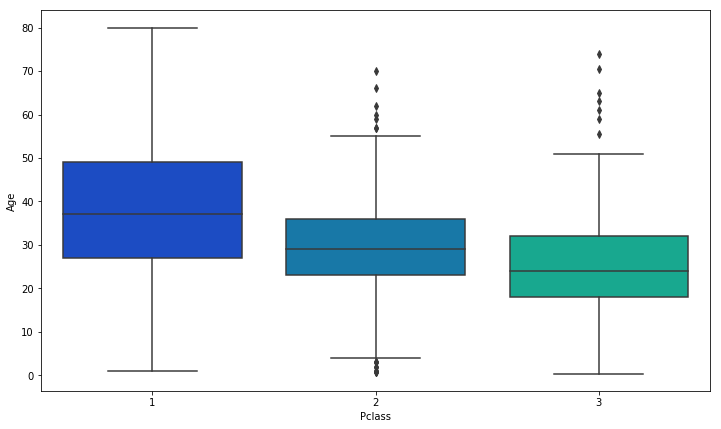

In [10]:
plt.figure(figsize=(12,7))
sb.boxplot(x='Pclass',y='Age',data=dataset,palette='winter')

In [11]:
def impute_age(cols):
    Age=cols[0]
    pclass=cols[1]
    if pd.isnull(Age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [12]:
dataset['Age']=dataset[['Age','Pclass']].apply(impute_age,axis=1)

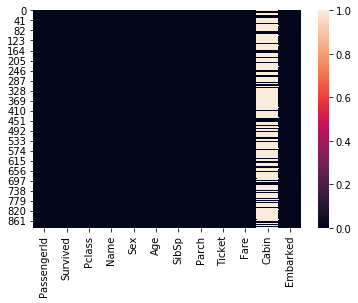

In [13]:
sb.heatmap(dataset.isnull())

In [14]:
dataset.drop('Cabin',axis=1,inplace=True)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [16]:
dataset.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [17]:
common_values='S'
dataset['Embarked']=dataset['Embarked'].fillna(common_values)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [18]:
pd.unique(dataset.Sex)

array(['male', 'female'], dtype=object)

In [19]:
pd.unique(dataset.Embarked)

array(['S', 'C', 'Q'], dtype=object)

In [20]:
sex=pd.get_dummies(dataset['Sex'],drop_first=True)
embark=pd.get_dummies(dataset['Embarked'],drop_first=True)

In [21]:
dataset.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [22]:
dataset=pd.concat([dataset,sex,embark],axis=1)

In [23]:
dataset.shape

(891, 9)

In [24]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [25]:
x_train=dataset.drop('Survived',axis=1)
y_train=dataset['Survived']

## using Adaboost

In [26]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier(n_estimators=5000,random_state=0)
ab.fit(x_train,y_train)
y_pred_ab=ab.predict(x_train)

In [27]:
ab.score(x_train,y_train)

0.9001122334455668

## using Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
# create a gaussion classifier
rf=RandomForestClassifier(n_estimators=100)
# train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_train)

In [29]:
rf.score(x_train,y_train)

0.9820426487093153

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
print('Accuracy of K-NN classifier on training set:{:.2f}'.format(knn.score(x_train,y_train)))

Accuracy of K-NN classifier on training set:0.76


In [31]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rates= [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb=GradientBoostingClassifier(n_estimators=20,learning_rate=learning_rate,random_state=0)
    gb.fit(x_train,y_train)
    print("Learning rate:",learning_rate)
    print("Accuracy Score (trainning): {0:.3f}".format(gb.score(x_train,y_train)))


Learning rate: 0.05
Accuracy Score (trainning): 0.833
Learning rate: 0.1
Accuracy Score (trainning): 0.843
Learning rate: 0.25
Accuracy Score (trainning): 0.872
Learning rate: 0.5
Accuracy Score (trainning): 0.896
Learning rate: 0.75
Accuracy Score (trainning): 0.915
Learning rate: 1
Accuracy Score (trainning): 0.917


In [32]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred_naive=classifier.predict(x_train)
y_pred_naive
classifier.score(x_train,y_train)

0.7901234567901234

In [33]:
from sklearn.svm import SVC
clf=SVC(kernel='linear',probability=True)
clf.fit(x_train,y_train)
y_pred_svm=clf.predict(x_train)
y_pred_svm

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [34]:
clf.support_vectors_

array([[ 3., 14.,  0., ...,  0.,  0.,  1.],
       [ 3., 31.,  1., ...,  0.,  0.,  1.],
       [ 2., 35.,  0., ...,  1.,  0.,  1.],
       ...,
       [ 1., 47.,  1., ...,  0.,  0.,  1.],
       [ 2., 28.,  1., ...,  0.,  0.,  0.],
       [ 1., 26.,  0., ...,  1.,  0.,  0.]])

In [35]:
len(clf.support_vectors_)

394

In [36]:
clf.score(x_train,y_train)

0.7867564534231201

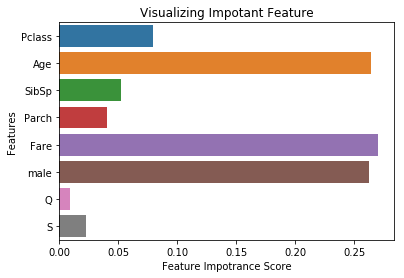

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
%matplotlib inline
feature_imp=pd.Series(rf.feature_importances_,index=dataset.columns[1:])
feature_imp
sb.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Feature Impotrance Score')
plt.ylabel('Features')
plt.title('Visualizing Impotant Feature')
plt.show()

## Model Evaluation

In [38]:
## model Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       549
           1       0.99      0.96      0.98       342

   micro avg       0.98      0.98      0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



## titanic_test

In [39]:
data=pd.read_csv('C:/Users/KARTHIK.G/Downloads/titanic_test.csv')
data.shape

(418, 11)

In [40]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
Passengerid=data['PassengerId']

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


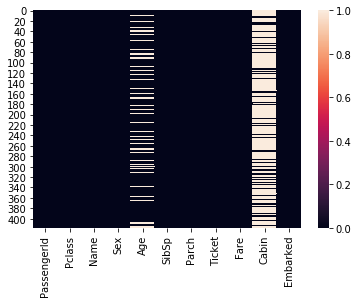

In [43]:
sb.heatmap(data.isnull())

In [44]:
# filling missing values
data['Age']=data[['Age','Pclass']].apply(impute_age,axis=1) # imputing age column
data.fillna(method='ffill',inplace=True) # imputing fare column

In [45]:
# categorical data encoading
sex_test=pd.get_dummies(data['Sex'],drop_first=True)
embark_test=pd.get_dummies(data['Embarked'],drop_first=True)

In [46]:
data.drop(['PassengerId','Sex','Embarked','Name','Ticket','Cabin'],axis=1,inplace=True)

In [47]:
# drop redundant column
data=pd.concat([data,sex_test,embark_test],axis=1)

In [48]:
data.shape

(418, 8)

In [49]:
data.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [50]:
X_test=data

In [51]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass    418 non-null int64
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
male      418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.6 KB


In [52]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [53]:
y_pred_test=rf.predict(X_test)
y_pred_test[0:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [54]:
rf.predict_proba(X_test)[0:5]

array([[0.96, 0.04],
       [0.78, 0.22],
       [0.86, 0.14],
       [0.32, 0.68],
       [0.56, 0.44]])

In [55]:
pd=pd.DataFrame({'PassengerId':Passengerid,'Survived':y_pred_test})

In [56]:
pd.to_csv('C:/Users/KARTHIK.G/Desktop/gk/karthik1.csv')

In [57]:
pd.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
